# Chemical Analysis & Red Wine Quality 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

### Check data type and NaN values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
columns = list(df.columns)
columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### Data Collection Methods
- 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'   
    
    분석장비 활용   
![와인분광법](https://www.anton-paar.com/fileadmin/_processed_/6/b/csm_03_Key_Modulyzer_Wine-01_5e520385ca.jpg)




- quality   
   
   소믈리에   
![quality](https://pds.joongang.co.kr//news/component/htmlphoto_mmdata/201807/06/8b1d494e-ed4f-49cc-a2d1-7a38097adfb1.jpg)



### 🚩 과제 설정
- 와인의 화학성분 분석데이터로부터 와인의 등급을 매기는 작업을 자동화 할 수 있는가?

### Descriptive statistics of the chemical features

In [5]:
df[columns[:-1]].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

### Histogram Visualization

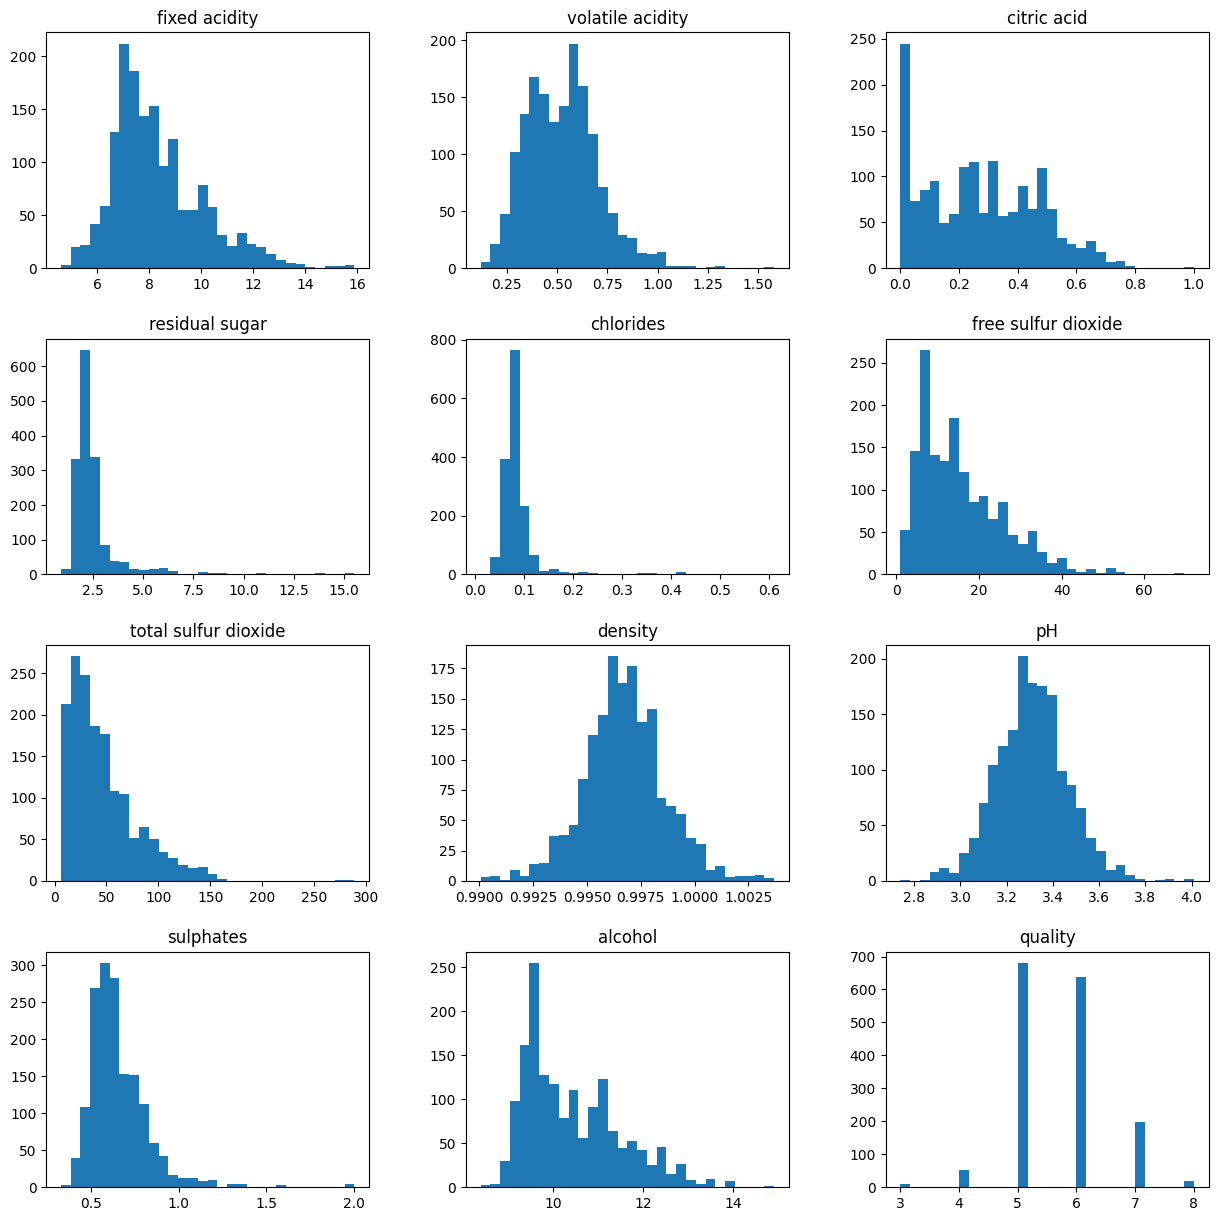

In [6]:
df.hist(bins=30, figsize=(15, 15), grid=False);

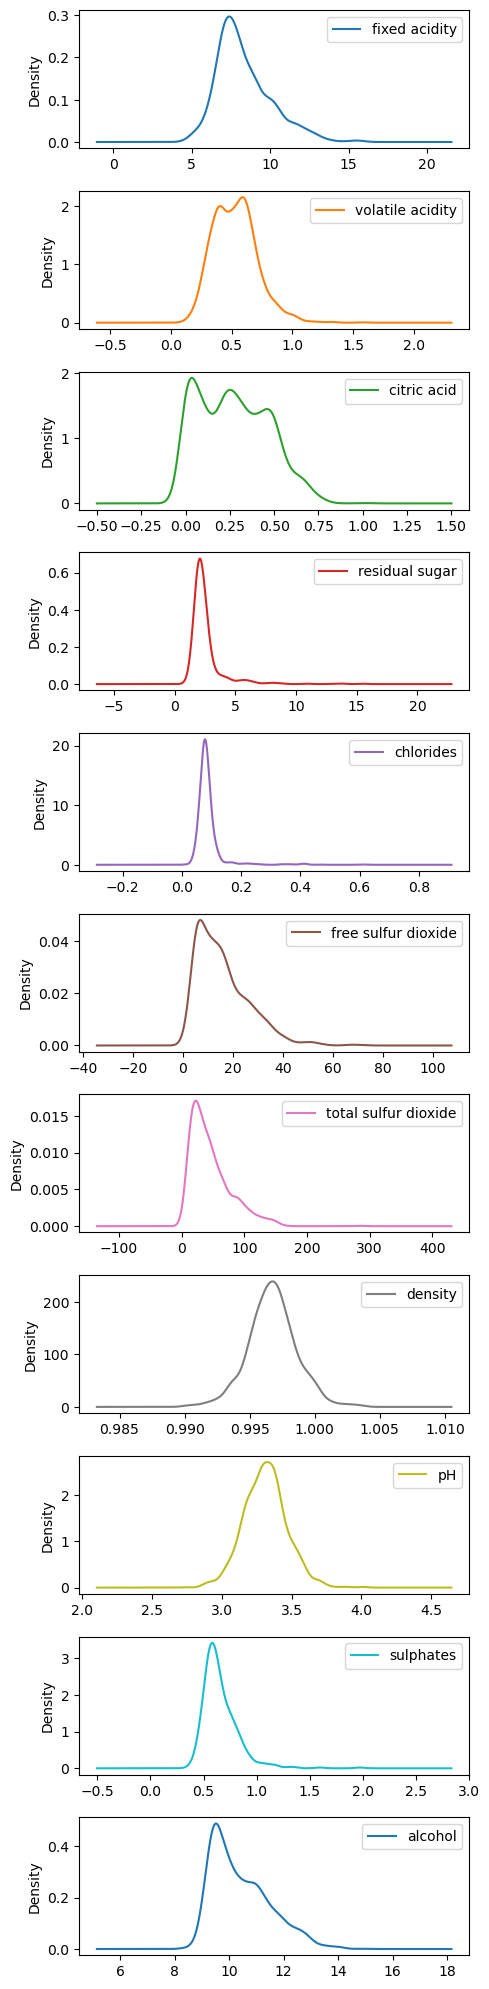

In [7]:
df[columns[:-1]].plot(kind='kde', subplots=True, figsize=(5, 20), sharex=False)
plt.tight_layout();

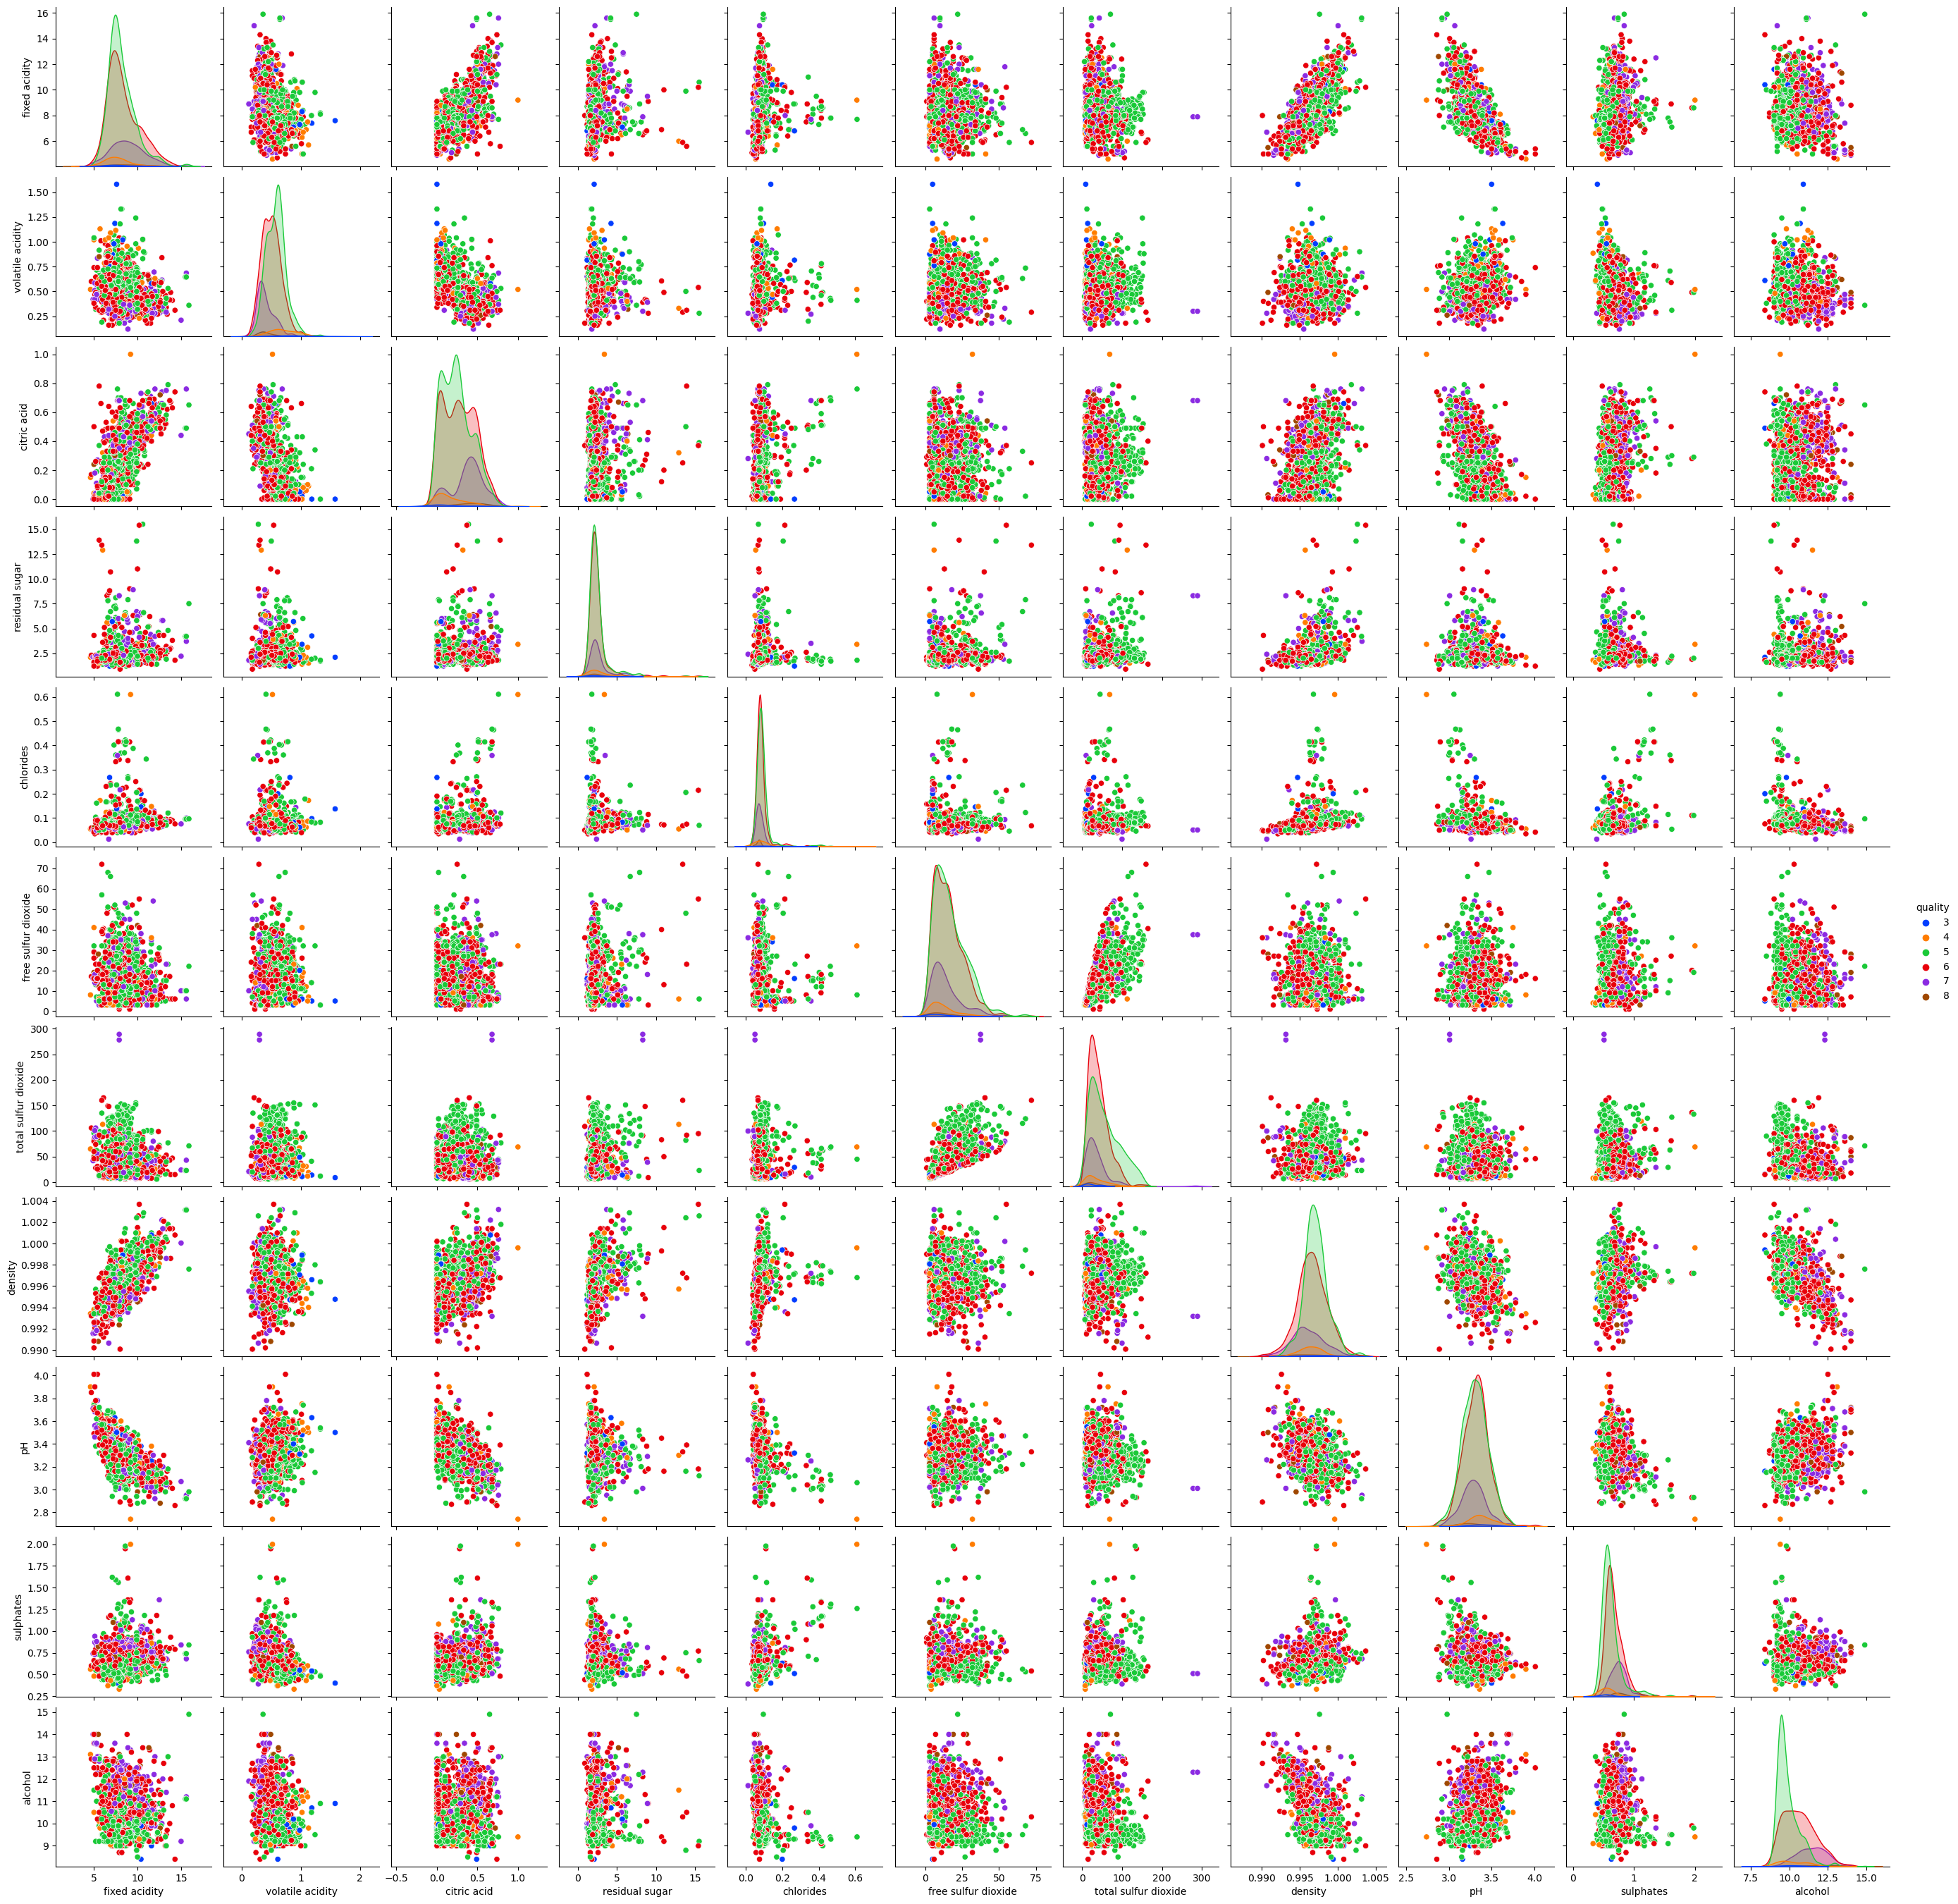

In [8]:
sns.pairplot(df, hue="quality", palette='bright');

### Wine Quality별 데이터 분포

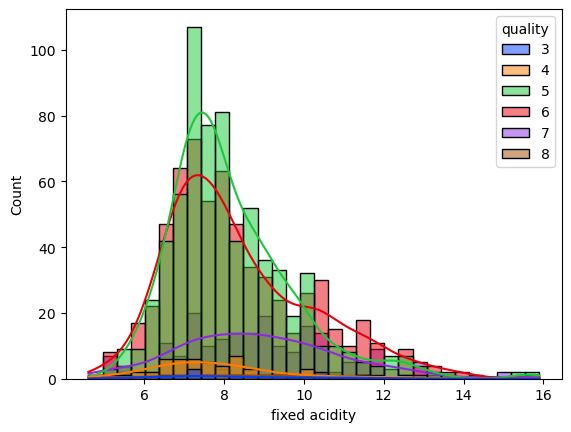

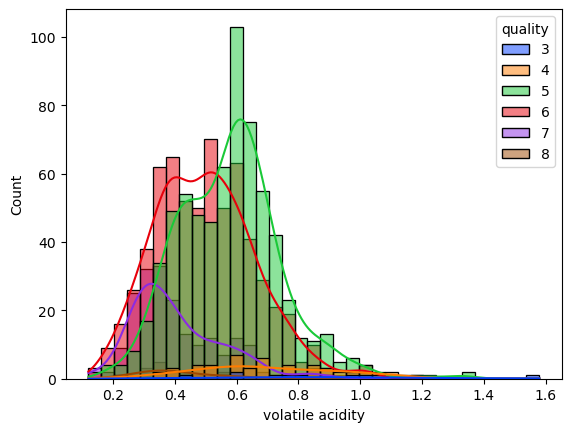

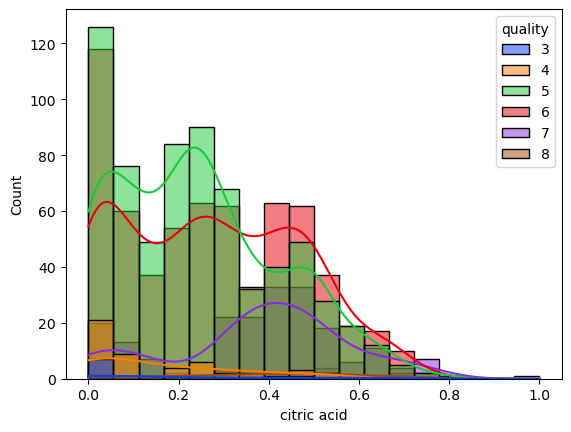

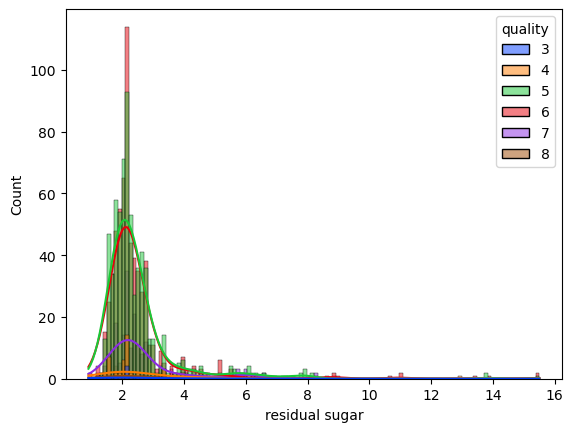

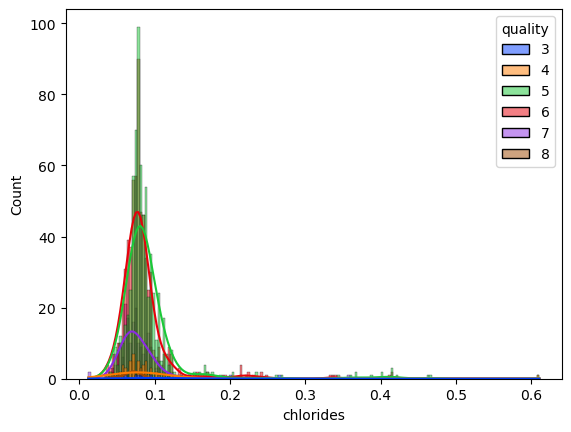

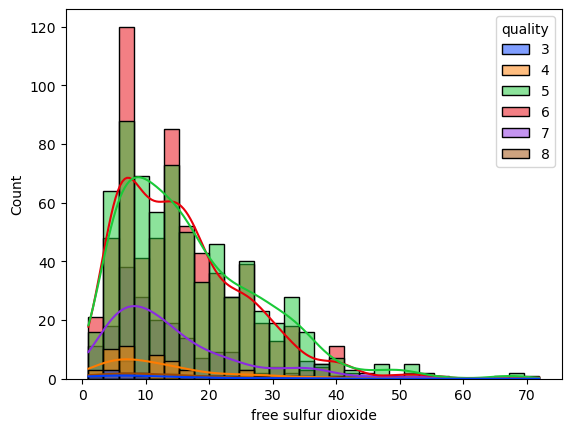

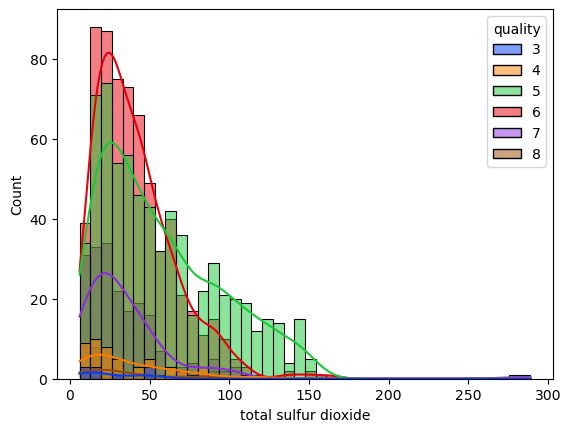

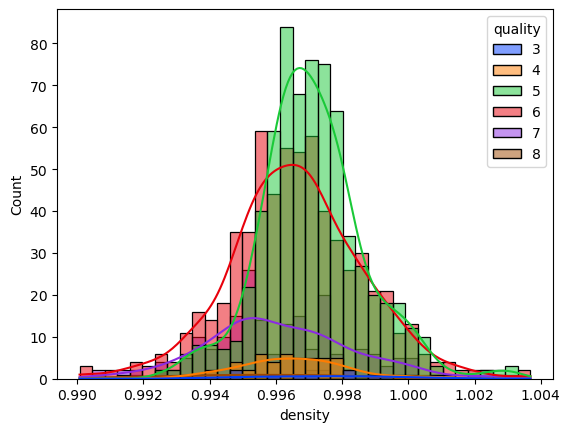

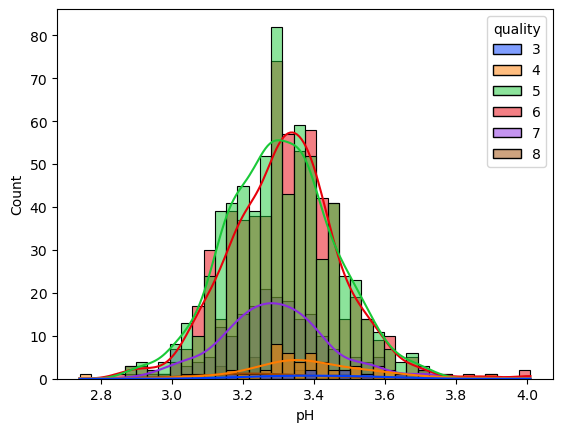

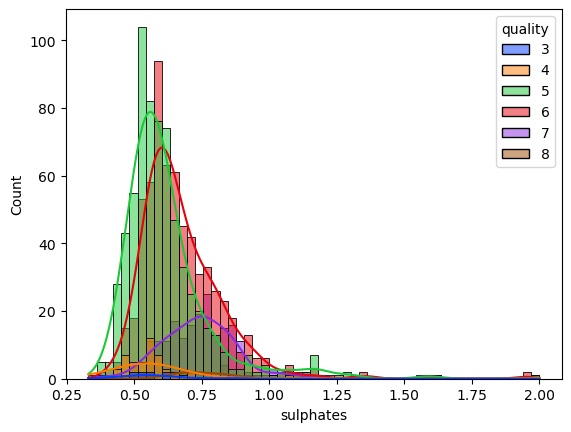

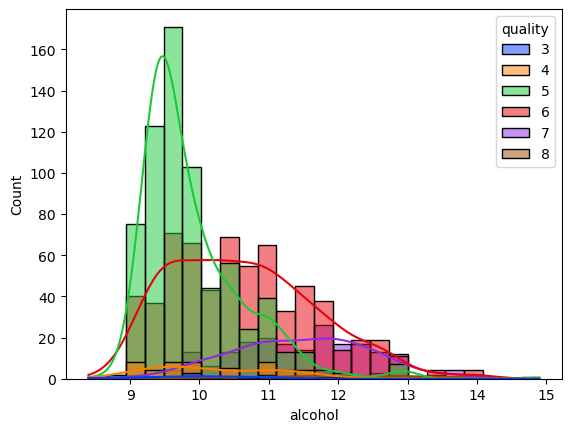

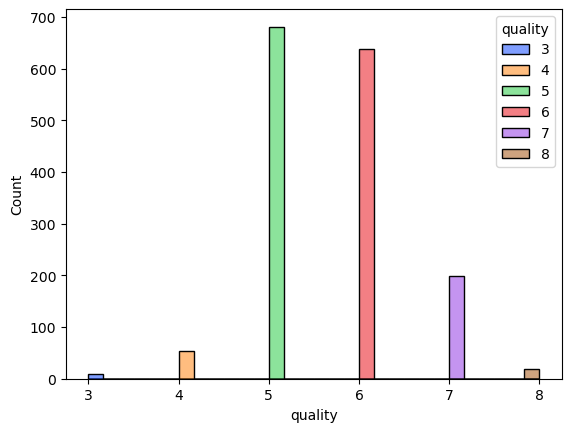

In [9]:
for column in columns:
    plt.figure()
    sns.histplot(df, x=column, hue='quality', palette='bright', kde=True)
    # https://seaborn.pydata.org/generated/seaborn.histplot.html 참조

### Python object analysis function

In [10]:
import inspect

def attr(obj):
    """Returns obj's variable_types, method_signatures, states, bounded_methods"""
    all_attr = dict([(attr, getattr(obj, attr)) for attr in dir(obj) if not attr.startswith("_")])
    methods = dict([(k, v) for k, v in all_attr.items() if callable(v)])

    sigs = {}
    for k, v in all_attr.items():
        if callable(v):
            try:
                sigs[k] = inspect.signature(v)  # may occur ValueError
            except ValueError:
                sigs[k] = "No signature available for built-in method"

    state_keys = sorted(list(set(all_attr.keys()) - set(methods.keys())))
    variables = dict([(v, type(getattr(obj, v))) for v in state_keys])
    states = dict([(v, getattr(obj, v)) for v in state_keys])
    return variables, sigs, states, methods

### Data Preparation for Machine Leaning

In [11]:
X = df[columns[:-1]].values
y = df[columns[-1]].values
X.shape, type(X), y.shape, type(y)

((1599, 11), numpy.ndarray, (1599,), numpy.ndarray)

In [12]:
# splitting the dataset into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

### Machine Learning Code using Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# make an instance Logistic Regression model
regressor = LogisticRegression()

print("regressor's initial state:")
init_state = attr(regressor)[2]
init_state

regressor's initial state:


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [15]:
# fit the model with training data
regressor.fit(X_train,y_train)

print("After fit(with training data), regressor's state")
fit_state = attr(regressor)[2]
fit_state


After fit(with training data), regressor's state


{'C': 1.0,
 'class_weight': None,
 'classes_': array([3, 4, 5, 6, 7, 8], dtype=int64),
 'coef_': array([[ 9.00095669e-02,  1.20947898e-01, -2.17026730e-02,
          7.87067681e-02,  1.34075897e-02,  5.40283553e-02,
         -5.99200983e-02, -1.13570009e-03,  1.46280001e-02,
         -2.77604649e-02, -1.98820464e-01],
        [-1.80455432e-01,  1.76574272e-01, -6.68353748e-02,
          1.54060963e-01,  1.33860150e-02, -4.22695139e-02,
          1.91329410e-02,  2.75165242e-02,  1.43630217e-01,
         -4.37678087e-02, -8.76497419e-03],
        [ 1.36605314e-01,  9.32299247e-01, -5.00806238e-01,
         -8.02268663e-02,  8.88904893e-02, -2.25319845e-02,
          3.40029111e-02,  4.70921807e-01,  1.65285156e+00,
         -3.81658231e-01, -6.30850312e-01],
        [ 2.15257408e-03, -3.57420769e-01,  7.03479922e-02,
         -1.18911382e-01, -2.42727591e-02,  7.50812657e-03,
          1.40505594e-02, -8.39710943e-02, -2.44836924e-01,
          2.23418870e-01,  2.58505237e-01],
        

In [16]:
print(f"New states generated after fit operation")
new_keys = fit_state.keys() - init_state.keys()
new_keys

New states generated after fit operation


{'classes_', 'coef_', 'intercept_', 'n_features_in_', 'n_iter_'}

In [17]:
for key in new_keys:
    print(f"📌 {key}: {fit_state[key]}\n")

📌 n_features_in_: 11

📌 classes_: [3 4 5 6 7 8]

📌 n_iter_: [100]

📌 intercept_: [-0.00172506  0.02789028  0.47385894 -0.0853427  -0.35584132 -0.05884014]

📌 coef_: [[ 9.00095669e-02  1.20947898e-01 -2.17026730e-02  7.87067681e-02
   1.34075897e-02  5.40283553e-02 -5.99200983e-02 -1.13570009e-03
   1.46280001e-02 -2.77604649e-02 -1.98820464e-01]
 [-1.80455432e-01  1.76574272e-01 -6.68353748e-02  1.54060963e-01
   1.33860150e-02 -4.22695139e-02  1.91329410e-02  2.75165242e-02
   1.43630217e-01 -4.37678087e-02 -8.76497419e-03]
 [ 1.36605314e-01  9.32299247e-01 -5.00806238e-01 -8.02268663e-02
   8.88904893e-02 -2.25319845e-02  3.40029111e-02  4.70921807e-01
   1.65285156e+00 -3.81658231e-01 -6.30850312e-01]
 [ 2.15257408e-03 -3.57420769e-01  7.03479922e-02 -1.18911382e-01
  -2.42727591e-02  7.50812657e-03  1.40505594e-02 -8.39710943e-02
  -2.44836924e-01  2.23418870e-01  2.58505237e-01]
 [-2.14689213e-02 -7.88326410e-01  4.50006475e-01 -2.51844715e-02
  -7.84789933e-02  1.52303716e-02  2.

In [18]:
regressor.classes_.shape, regressor.coef_.shape, regressor.intercept_.shape

((6,), (6, 11), (6,))

#### run and check the model performance with test data

In [19]:
# predict the result
y_pred = regressor.predict(X_test)
y_pred

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5,

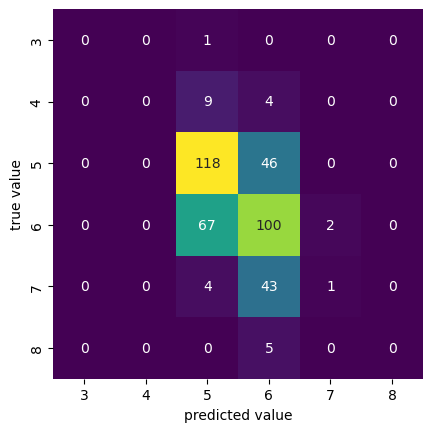

In [20]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

xticklabels = yticklabels = [3, 4, 5, 6, 7, 8]
sns.heatmap(
    mat,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    fmt="d",
    cmap='viridis'
)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [21]:
# count the occurrences of y_test unique value
states, counts = np.unique(y_test, return_counts=True)
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html

print(f"y_test value counts")
for v, c in zip(states, counts):
    print(f"quality {v}: {c:>4}")


y_test value counts
quality 3:    1
quality 4:   13
quality 5:  164
quality 6:  169
quality 7:   48
quality 8:    5


In [22]:
# accuracy per class
print("Accuracy per class")
for i in range(len(mat)):
    print(f"class {xticklabels[i]}: {mat[i,i] / mat[i].sum() * 100: >4.1f} %")

Accuracy per class
class 3:  0.0 %
class 4:  0.0 %
class 5: 72.0 %
class 6: 59.2 %
class 7:  2.1 %
class 8:  0.0 %


### Total Accuracy

In [23]:
accuracy = np.diag(mat).sum() / mat.sum() * 100
print(f"accuracy: {accuracy} %")

accuracy: 54.75 %


### XGBoost
참조 : https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn

In [24]:
import xgboost as xgb

In [25]:
X = df[columns[:-1]].values
y = df[columns[-1]].values - 3
X.shape, type(X), y.shape, type(y)

((1599, 11), numpy.ndarray, (1599,), numpy.ndarray)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

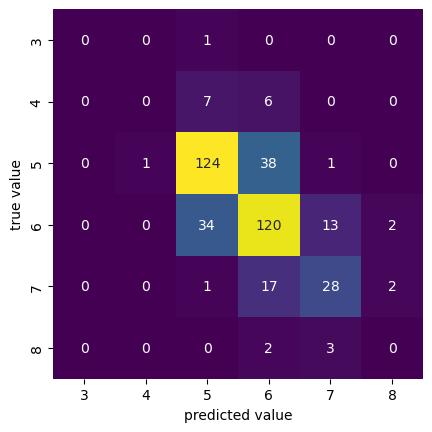

In [27]:
# make an instance XGBoost model
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mat = confusion_matrix(y_test, y_pred)

xticklabels = yticklabels = [3, 4, 5, 6, 7, 8]
sns.heatmap(
    mat,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    fmt="d",
    cmap='viridis'
)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [28]:
# accuracy per class
print("Accuracy per class")
for i in range(len(mat)):
    print(f"class {xticklabels[i]}: {mat[i,i] / mat[i].sum() * 100: >4.1f} %")

Accuracy per class
class 3:  0.0 %
class 4:  0.0 %
class 5: 75.6 %
class 6: 71.0 %
class 7: 58.3 %
class 8:  0.0 %


🚩 LogisticRegression 모델과 비교해 보면 class 7 에서 정확도 향상이 이루어졌다

In [29]:
accuracy = np.diag(mat).sum()/mat.sum() * 100
print(f"accuracy: {accuracy} %")

accuracy: 68.0 %


### Training XGBoost model with all data

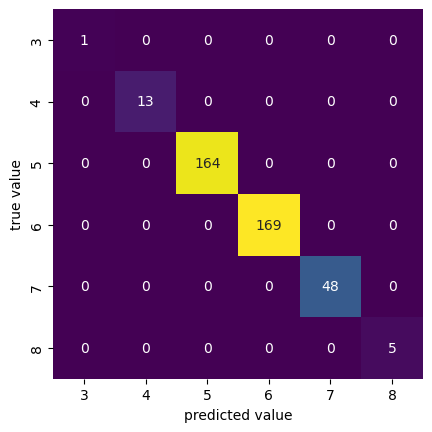

In [30]:
# make an instance XGBoost model
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=1)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X_test)

mat = confusion_matrix(y_test, y_pred)

xticklabels = yticklabels = [3, 4, 5, 6, 7, 8]
sns.heatmap(
    mat,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    fmt="d",
    cmap='viridis'
)
plt.xlabel("predicted value")
plt.ylabel("true value");

🚩 테스트 데이터가 학습 데이터로 사용되면 테스트 결과는 100% 정확도를 보인다   
🚩 학습 데이터에 테스트 데이터를 포함하면 모델의 실제 예측성능이 과대포장될 수 있음   
🚩 학습의 목표는 처음보는 문제를 잘 푸는게 핵심. 예전에 풀었던 문제의 정답을 기억하는 건 별 의미가 없음.

## Wine analysis from sklearn.datasets
https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn

In [31]:
from sklearn.datasets import load_wine

wine = load_wine()
attr(wine)[0]  # display wine's attribute and its datatype

{'DESCR': str,
 'data': numpy.ndarray,
 'feature_names': list,
 'frame': NoneType,
 'target': numpy.ndarray,
 'target_names': numpy.ndarray}

### Check the wine's attributes

In [32]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [33]:
X = wine.data
y = wine.target
X.shape, y.shape

((178, 13), (178,))

In [34]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [35]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [36]:
# make labels from wine.target_names
xticklabels = yticklabels = list(wine.target_names)
xticklabels

['class_0', 'class_1', 'class_2']

### make train, test dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

### check the performance of xgb.XGBClassifier

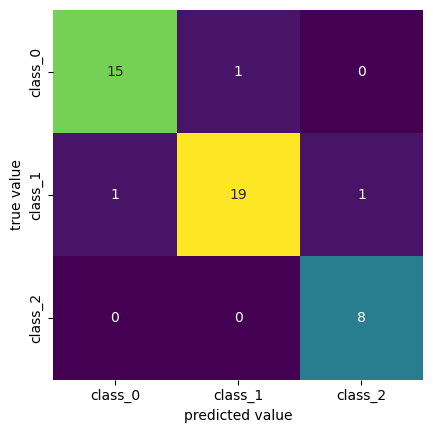

In [38]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mat = confusion_matrix(y_test, y_pred)

sns.heatmap(
    mat,
    square=True,
    annot=True,
    cbar=False,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
    fmt="d",
    cmap='viridis'
)
plt.xlabel("predicted value")
plt.ylabel("true value");

In [39]:
accuracy = np.diag(mat).sum()/mat.sum() * 100
print(f"accuracy: {accuracy:4.1f} %")

accuracy: 93.3 %


🚩 Logistic Regression Model과 비슷한 정확도 성능을 보임 

### 주요 함수 목록

```python
df.info()
df.describe()
df.hist()
df.plot()

np.unique()
np.diag()

sns.histplot()
sns.pairplot()
sns.heatmap()

sklearn.model_selection.train_test_split()
sklearn.linear_model.LogisticRegression
sklearn.metrics.confusion_matrix()
xgboost.XGBClassifier
```
